## Imports

Check readme for dependencies!

In [5]:
%matplotlib inline

# subspace optimization method
from subspace_optimization import orth_subspaces

import numpy as np
import scipy.linalg as LA
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 7]

## Create toy data 

Function creates surrogate data to apply the subspace optimization to

In [6]:
def create_toy_data(theta, var_b, n_samples_b):
    
    '''
    Parameters
    ----------
    theta : angle by which dataset B is rotated with respect to dataset A | float
    var_b : variance by which dataset B is scaled with respect to dataset B | float in range (btw. 0. & 1.)
    n_samples : number of samples in dataset B | int (> 1)
    
    Returns
    -------
    A, B : two datasets | 2D arrays shape(n_samples,dim)
    '''

    
    # number of datapoints for dataset A
    n_samples_a = 1000 
    # Note, for the sake of this example dim is 2D and equal for both subspaces. 
    # Method supports arbitrary (& different btw. datasets) dimensionalities
    dim         = 2    
    # rotation matrix to rotate one dataset relative to other
    rotMtx      = np.array([np.cos(theta*np.pi/180), np.sin(theta*np.pi/180), - np.sin(theta*np.pi/180), np.cos(theta*np.pi/180)]).reshape(2,2)

    # create datasets
    A = np.random.randn(n_samples_a,dim)
    B = np.random.randn(n_samples_b,dim)

    # find an orthonormal basis
    Q = LA.orth(np.random.randn(dim,dim)) 

    Q_a = Q[:,0]
    Q_b = np.dot(rotMtx,Q[:,1]) # rotate one of the orthonormal vectors

    # projection matrices
    Q_a = np.outer(Q_a,Q_a)
    Q_b = np.outer(Q_b,Q_b)

    # generate data at the two subspaces
    A = np.dot(A,Q_a) + 0.05 * np.random.randn(*A.shape)
    B = var_b * (np.dot(B,Q_b) + 0.05 * np.random.randn(*B.shape)) 
    # Note, constant factor controls vrariance on second data dimension which we ignore in examples 
    
    return A, B



## perform optimization & plot

performs optimization in this case for specific configurations of rotation angle, sample sizes and variances

In [ ]:
# get toy data with specific angle btw. datasets
# the rest is matched btw. datasets for this example
theta = 0.
var_b = 1.
n_samples_b = 1000

A,B = create_toy_data(theta, var_b ,n_samples_b)
# set up data (dimensionalities set two 1 for sake of example)
DataStruct = pd.DataFrame([[A, 1], [B, 1]], columns=['A', 'dim'])
# preprocess data
dat_proc = orth_subspaces(DataStruct)
# perform optimization
Q_opt = dat_proc.estimate_orth_subspaces(DataStruct)



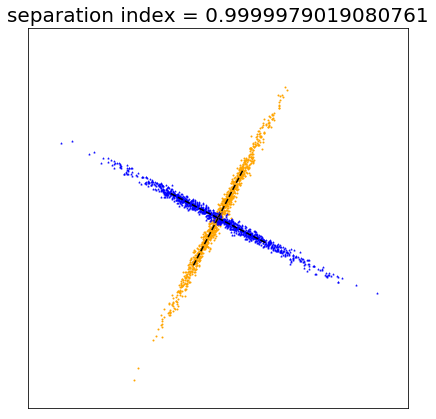

In [8]:
dat_proc.plot_demo(DataStruct, Q_opt)

In this example, datasets (point clouds) are othogonal such that the optimized orthogonal subspaces (lines) align with respective datasets.
This is also indicated by the separation index: 1 = orthogonal datasets; .5 = aligned datasets

In the following we increase alignment of datasets by changing theta: 

In [ ]:
# get toy data with specific angle btw. datasets
# the rest is matched btw. datasets for this example
theta = 45.
var_b = 1.
n_samples_b = 1000

A,B = create_toy_data(theta, var_b ,n_samples_b)
# set up data (dimensionalities set two 1 for sake of example)
DataStruct = pd.DataFrame([[A, 1], [B, 1]], columns=['A', 'dim'])
# preprocess data
dat_proc = orth_subspaces(DataStruct)
# perform optimization
Q_opt = dat_proc.estimate_orth_subspaces(DataStruct)



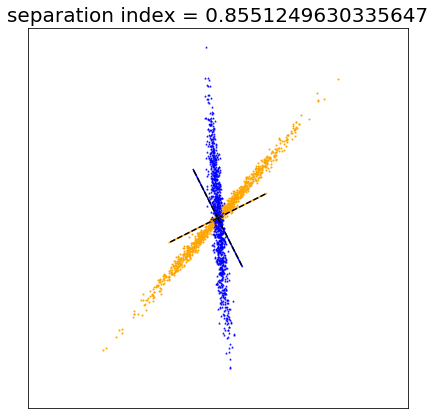

In [10]:
dat_proc.plot_demo(DataStruct, Q_opt)

Note, although datasets are more aligend (see separation index) our optimization method identifies 2 orthogonal subspaces that both explain maximum amount of variance in the respective datasets (Note, maximal only under the constraint of orthogonality). Due to the fact that the datasets align each subspaces also captures some variance form the respective opther dataset.

Now, we take a look at the extreme case:

In [ ]:
# get toy data with specific angle btw. datasets
# the rest is matched btw. datasets for this example
theta = 90.
var_b = 1.
n_samples_b = 1000

A,B = create_toy_data(theta, var_b ,n_samples_b)
# set up data (dimensionalities set two 1 for sake of example)
DataStruct = pd.DataFrame([[A, 1], [B, 1]], columns=['A', 'dim'])
# preprocess data
dat_proc = orth_subspaces(DataStruct)
# perform optimization
Q_opt = dat_proc.estimate_orth_subspaces(DataStruct)


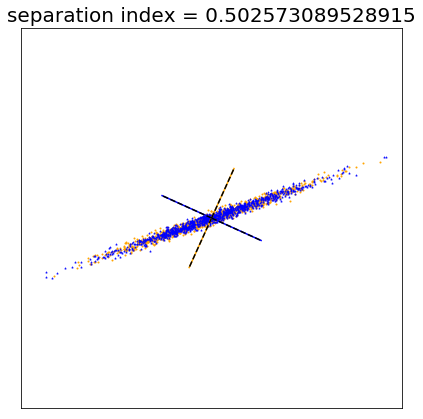

In [12]:
dat_proc.plot_demo(DataStruct, Q_opt)

Datasets completely align reducing the separation index to its minimum (0.5). Optimized subspaces remain orthogonal 
but explain equal amount of variance in both datasets.

In the following we show that different sample sizes and variances do not bias this method i.e. non-greeedy (as would be the case for other related methods):

In [ ]:
# Now we bias dataset B by lowering sample numbers and decreasing variance
theta = 45.
var_b = .2
n_samples_b = 100

A,B = create_toy_data(theta, var_b ,n_samples_b)
# set up data (dimensionalities set two 1 for sake of example)
DataStruct = pd.DataFrame([[A, 1], [B, 1]], columns=['A', 'dim'])
# preprocess data
dat_proc = orth_subspaces(DataStruct)
# perform optimization
Q_opt = dat_proc.estimate_orth_subspaces(DataStruct)

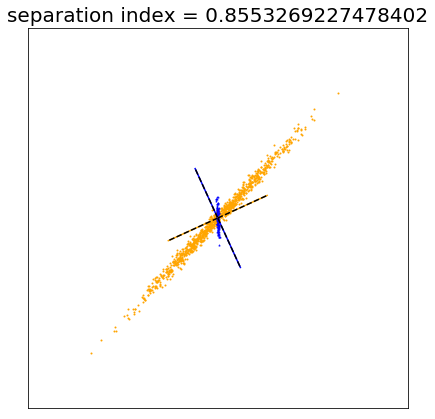

In [14]:
dat_proc.plot_demo(DataStruct, Q_opt)

Note, the method displays no obvious bias toward the orange dataset. 